In [1]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import torch

from model import ResNet

device = torch.device('cuda:0')


In [2]:
x, sr = sf.read('resources/wav/id06310_eemPrRNIUek_00184.wav')
x = x.astype(np.float32)

In [3]:
model_spect = ResNet(n_layers=[3, 5, 5, 3], init_planes=32)
model_spect.load_state_dict(torch.load('models_spect/asr_e66.pth', map_location=device))
model_spect.eval()
model_spect.to(device)

model_t1 = ResNet(n_layers=[3, 5, 5, 3], init_planes=32)
model_t1.load_state_dict(torch.load('models_t1/asr_e51.pth', map_location=device))
model_t1.eval()
model_t1.to(device)

model_tf1 = ResNet(n_layers=[3, 5, 5, 3], init_planes=32)
model_tf1.load_state_dict(torch.load('models_tf1/asr_e43.pth', map_location=device))
model_tf1.eval()
model_tf1.to(device)

model_old = ResNet(n_layers=[3, 5, 5, 3], init_planes=32)
model_old.load_state_dict(torch.load('models_old/asr_e49.pth', map_location=device))
model_old.eval()
model_old.to(device)
print('')

In [4]:
sf.write('original.wav', x, samplerate=sr)
sf.write('original_downsample.wav', x[::2], samplerate=sr // 2)

In [5]:
x_zero = x.copy()
x_zero[::2] = 0

In [6]:
x_zero = torch.from_numpy(x_zero).unsqueeze(0).unsqueeze(0).to(device)

with torch.no_grad():
    out_spect = model_spect(x_zero)
sf.write('r_spect.wav', out_spect.squeeze().cpu().numpy(), 16000)

with torch.no_grad():
    out_t1 = model_t1(x_zero)
sf.write('r_t1.wav', out_t1.squeeze().cpu().numpy(), 16000)

with torch.no_grad():
    out_tf1 = model_tf1(x_zero)
sf.write('r_tf1.wav', out_tf1.squeeze().cpu().numpy(), 16000)

with torch.no_grad():
    out_old = model_old(x_zero)
sf.write('r_old.wav', out_old.squeeze().cpu().numpy(), 16000)


Text(0.5, 1.0, 'upsampling + spect')

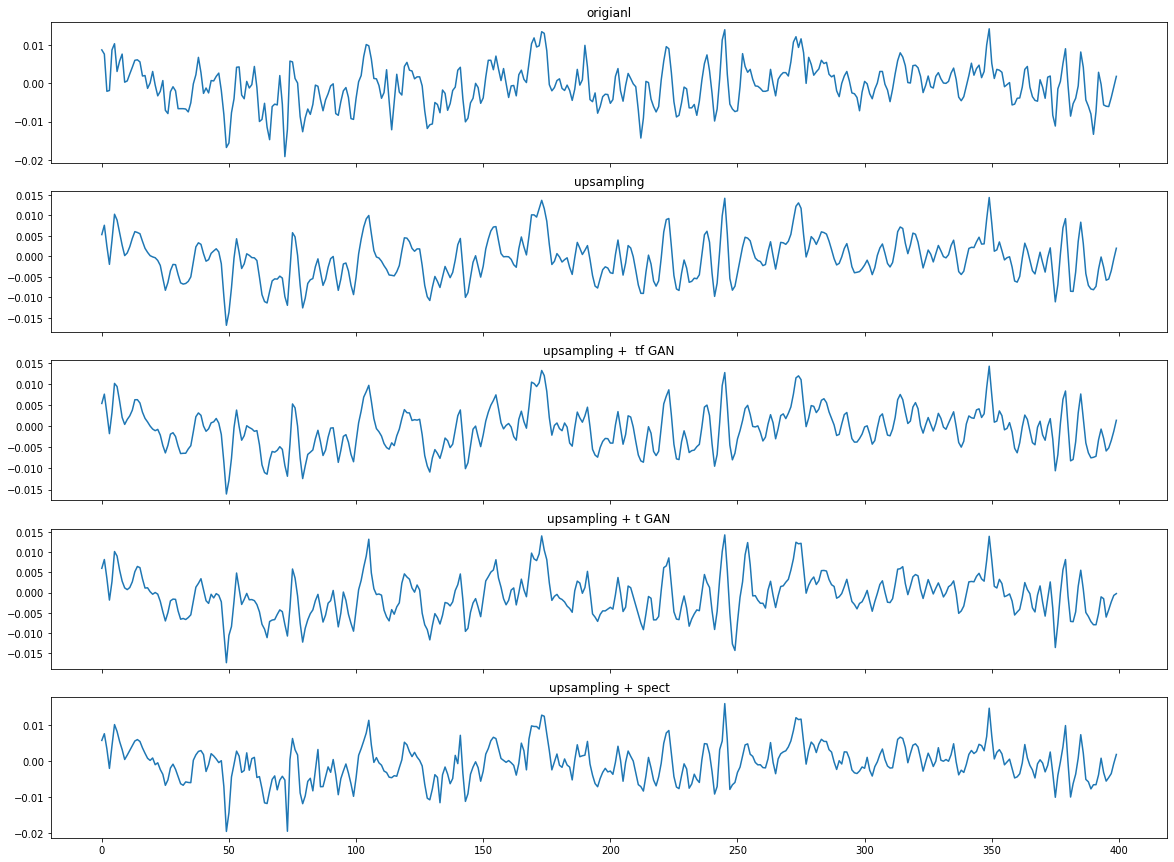

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(20, 15))
offset = 60000
n_samples = 400
ax1.plot(x[offset:offset + n_samples])
ax1.set_title('origianl')
ax2.plot(out_old.squeeze().cpu().numpy()[offset:offset + n_samples])
ax2.set_title('upsampling')
ax3.plot(out_tf1.squeeze().cpu().numpy()[offset:offset + n_samples])
ax3.set_title('upsampling +  tf GAN')
ax4.plot(out_t1.squeeze().cpu().numpy()[offset:offset + n_samples])
ax4.set_title('upsampling + t GAN')
ax5.plot(out_spect.squeeze().cpu().numpy()[offset:offset + n_samples])
ax5.set_title('upsampling + spect')